In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout



In [32]:
# import dataset
data = pd.read_csv("Google_train_data.csv")

In [34]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [35]:
data.shape   

(1258, 6)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [37]:
data.duplicated().sum()

0

In [38]:
# Convert the 'Close' column to numeric, coercing errors to NaN
data["Close"] = pd.to_numeric(data["Close"], errors='coerce')

# Drop rows with any NaN values
data = data.dropna()

# Select the 'Close' column and convert it to a numpy array
trainData = data.iloc[:, 4:5].values


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [40]:
sc = MinMaxScaler(feature_range=(0, 1))   
trainData = sc.fit_transform(trainData)  
trainData.shape  


(1149, 1)

In [42]:
X_train = []
y_train = []
for i in range(60, 1149):  # 60 : timestamp // 1149 : length of the data
    X_train.append(trainData[i-60:i, 0])  
    y_train.append(trainData[i, 0])  

X_train, y_train = np.array(X_train), np.array(y_train)  # Convert lists to numpy arrays


In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshaping to add the batch_size axis
X_train.shape  # Output the shape of the reshaped X_train


(1089, 60, 1)

In [44]:
model = Sequential()  

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))  
model.add(Dropout(0.2)) 

model.add(LSTM(units=100, return_sequences=True))  #
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=100))  
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Add the output layer

model.compile(optimizer='adam', loss='mean_squared_error')  


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
35/35 - 28s - 795ms/step - loss: 0.0348
Epoch 2/20
35/35 - 9s - 248ms/step - loss: 0.0124
Epoch 3/20
35/35 - 13s - 373ms/step - loss: 0.0089
Epoch 4/20
35/35 - 10s - 290ms/step - loss: 0.0084
Epoch 5/20
35/35 - 12s - 344ms/step - loss: 0.0075
Epoch 6/20
35/35 - 10s - 290ms/step - loss: 0.0065
Epoch 7/20
35/35 - 9s - 262ms/step - loss: 0.0059
Epoch 8/20
35/35 - 11s - 309ms/step - loss: 0.0062
Epoch 9/20
35/35 - 9s - 253ms/step - loss: 0.0060
Epoch 10/20
35/35 - 8s - 239ms/step - loss: 0.0062
Epoch 11/20
35/35 - 10s - 286ms/step - loss: 0.0098
Epoch 12/20
35/35 - 10s - 280ms/step - loss: 0.0064
Epoch 13/20
35/35 - 10s - 291ms/step - loss: 0.0057
Epoch 14/20
35/35 - 10s - 280ms/step - loss: 0.0049
Epoch 15/20
35/35 - 9s - 243ms/step - loss: 0.0051
Epoch 16/20
35/35 - 9s - 271ms/step - loss: 0.0047
Epoch 17/20
35/35 - 10s - 294ms/step - loss: 0.0046
Epoch 18/20
35/35 - 13s - 361ms/step - loss: 0.0056
Epoch 19/20
35/35 - 10s - 300ms/step - loss: 0.0048
Epoch 20/20
35/35 - 11s - 3

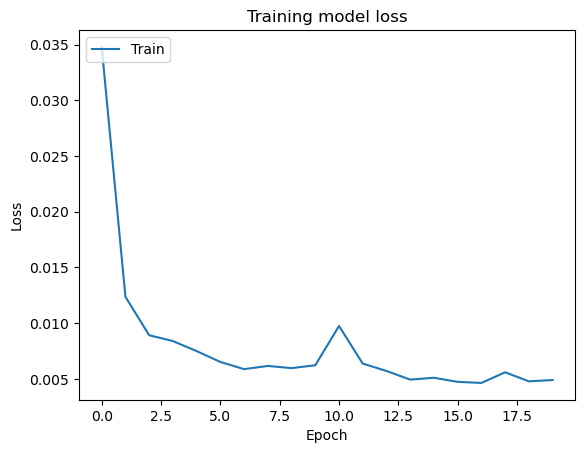

In [46]:
plt.plot(hist.history['loss'])  
plt.title("Training model loss")
plt.ylabel("Loss")  
plt.xlabel("Epoch")  
plt.legend(["Train"], loc="upper left")  
plt.show()


In [47]:
# Load the test data
testData = pd.read_csv('Google_test_data.csv')  

# Convert the 'Close' column to numeric, coercing errors to NaN
testData["Close"] = pd.to_numeric(testData["Close"], errors='coerce')

# Drop rows with any NaN values
testData = testData.dropna() 

# Select the 'Close' column for further processing
testData = testData.iloc[:, 4:5]

# Prepare y_test for comparison
y_test = testData.iloc[60:, :].values  

# Prepare the input array for the model
inputClosing = testData.iloc[:, :].values  
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape  

# Prepare X_test array
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  

X_test.shape  


(192, 60, 1)

In [48]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


In [49]:
y_pred 

array([[1.2143712],
       [1.2180041],
       [1.2308341],
       [1.2492864],
       [1.2628675],
       [1.2600716],
       [1.2425905],
       [1.2206935],
       [1.2077649],
       [1.2057441],
       [1.2001765],
       [1.1895585],
       [1.180179 ],
       [1.1716297],
       [1.1711662],
       [1.1777381],
       [1.1989769],
       [1.2307605],
       [1.2654175],
       [1.2979583],
       [1.3071564],
       [1.2977952],
       [1.2703394],
       [1.2354499],
       [1.2067453],
       [1.1931949],
       [1.1936953],
       [1.1975983],
       [1.1928948],
       [1.1829369],
       [1.1710978],
       [1.157282 ],
       [1.1361078],
       [1.1101257],
       [1.10142  ],
       [1.1149036],
       [1.1415434],
       [1.1699233],
       [1.194837 ],
       [1.204949 ],
       [1.2146813],
       [1.227573 ],
       [1.2436044],
       [1.258571 ],
       [1.2677696],
       [1.2664287],
       [1.2531133],
       [1.2421346],
       [1.2397947],
       [1.2475749],


In [50]:
predicted_price = sc.inverse_transform(y_pred)

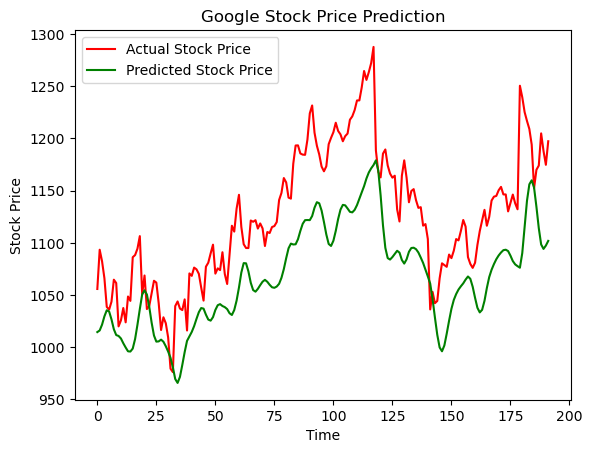

In [51]:
plt.plot(y_test, color='red', label='Actual Stock Price')  # Fixed typos and syntax
plt.plot(predicted_price, color='green', label='Predicted Stock Price')  # Fixed typos and syntax
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
